In [1]:
# Import packages
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sklearn as sk
import scipy as sp
import random
from scipy import signal
from copy import copy, deepcopy
from scipy.interpolate import interp1d
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import os
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

In [2]:
# Custom F1 scores by class
def f1_single_class_1(X, Y):
    scores = sk.metrics.f1_score(X, Y, average=None)
    return scores[0]
def f1_single_class_2(X, Y):
    scores = sk.metrics.f1_score(X, Y, average=None)
    return scores[1]
def f1_single_class_3(X, Y):
    scores = sk.metrics.f1_score(X, Y, average=None)
    return scores[2]
def f1_single_class_4(X, Y):
    scores = sk.metrics.f1_score(X, Y, average=None)
    return scores[3]

# Custom recall scores by class
def recall_single_class_1(X, Y):
    scores = sk.metrics.recall_score(X, Y, average=None)
    return scores[0]
def recall_single_class_2(X, Y):
    scores = sk.metrics.recall_score(X, Y, average=None)
    return scores[1]
def recall_single_class_3(X, Y):
    scores = sk.metrics.recall_score(X, Y, average=None)
    return scores[2]
def recall_single_class_4(X, Y):
    scores = sk.metrics.recall_score(X, Y, average=None)
    return scores[3]

# Custom precision scores by class
def precision_single_class_1(X, Y):
    scores = sk.metrics.precision_score(X, Y, average=None)
    return scores[0]
def precision_single_class_2(X, Y):
    scores = sk.metrics.precision_score(X, Y, average=None)
    return scores[1]
def precision_single_class_3(X, Y):
    scores = sk.metrics.precision_score(X, Y, average=None)
    return scores[2]
def precision_single_class_4(X, Y):
    scores = sk.metrics.precision_score(X, Y, average=None)
    return scores[3]

In [3]:
#USING RAW DATA

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_RF_raw = []
mean_scores_RF_raw = []
mean_by_score = []

scoring_set = {'accuracy' : 'accuracy',
               'precision_1' : make_scorer(precision_single_class_1),
               'precision_2' : make_scorer(precision_single_class_2),
               'precision_3' : make_scorer(precision_single_class_3),
               'precision_4' : make_scorer(precision_single_class_4),
               'recall_1' : make_scorer(recall_single_class_1),
               'recall_2' : make_scorer(recall_single_class_2),
               'recall_3' : make_scorer(recall_single_class_3),
               'recall_4' : make_scorer(recall_single_class_4),
               'f1_1' : make_scorer(f1_single_class_1),
               'f1_2' : make_scorer(f1_single_class_2),
               'f1_3' : make_scorer(f1_single_class_3),
               'f1_4' : make_scorer(f1_single_class_4),
               'mc_auc_roc_ovo' : make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)}

model = RandomForestClassifier()
over = SMOTE()
steps = [('over1', over),('over2', over),('over3', over),('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_raw_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_raw_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_RF_raw.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_RF_raw.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))

    

Window: 10 ; accuracy: 0.9146552929660188 ; precision_1: 0.9533575728519444 ; precision_2: 0.7850441162569237 ; precision_3: 0.9716761629632293 ; precision_4: 0.9603879555857456 ; recall_1: 0.7892281978554699 ; recall_2: 0.9681246297086077 ; recall_3: 0.9810382417064404 ; recall_4: 0.9939588743729819 ; f1_1: 0.8635346917869545 ; f1_2: 0.8669988478123234 ; f1_3: 0.9763330532874221 ; f1_4: 0.9768551992573965 ; mc_auc_roc_ovo: 0.9938244082813805
Window: 20 ; accuracy: 0.9006986664901588 ; precision_1: 0.9364220712387327 ; precision_2: 0.7709155706467715 ; precision_3: 0.9611066700979338 ; precision_4: 0.9441153359418168 ; recall_1: 0.7653747320829758 ; recall_2: 0.95699617382013 ; recall_3: 0.9727043337859089 ; recall_4: 0.9894133654612697 ; f1_1: 0.8422738375543796 ; f1_2: 0.8538912299759478 ; f1_3: 0.9668629574267864 ; f1_4: 0.966197068688361 ; mc_auc_roc_ovo: 0.9907097340134404
Window: 30 ; accuracy: 0.8878960309097294 ; precision_1: 0.9195482225608207 ; precision_2: 0.7584696258247928

In [4]:
#USING FEATURES

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_RF_feat = []
mean_scores_RF_feat = []
mean_by_score = []

scoring_set = {'accuracy' : 'accuracy',
               'precision_1' : make_scorer(precision_single_class_1),
               'precision_2' : make_scorer(precision_single_class_2),
               'precision_3' : make_scorer(precision_single_class_3),
               'precision_4' : make_scorer(precision_single_class_4),
               'recall_1' : make_scorer(recall_single_class_1),
               'recall_2' : make_scorer(recall_single_class_2),
               'recall_3' : make_scorer(recall_single_class_3),
               'recall_4' : make_scorer(recall_single_class_4),
               'f1_1' : make_scorer(f1_single_class_1),
               'f1_2' : make_scorer(f1_single_class_2),
               'f1_3' : make_scorer(f1_single_class_3),
               'f1_4' : make_scorer(f1_single_class_4),
               'mc_auc_roc_ovo' : make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)}

model = RandomForestClassifier()
over = SMOTE()
steps = [('over1', over),('over2', over),('over3', over),('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_feat_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_feat_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_RF_feat.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_RF_feat.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))

    

Window: 10 ; accuracy: 0.979065864913998 ; precision_1: 0.9703396973581239 ; precision_2: 0.9684399053675469 ; precision_3: 0.994911182716106 ; precision_4: 0.9606807919113649 ; recall_1: 0.975984322531919 ; recall_2: 0.9686466898469406 ; recall_3: 0.9859642920275763 ; recall_4: 0.9923752540773629 ; f1_1: 0.9731485030652315 ; f1_2: 0.968535287415025 ; f1_3: 0.9904167411749601 ; f1_4: 0.9762464980404936 ; mc_auc_roc_ovo: 0.9994061300647132
Window: 20 ; accuracy: 0.9735096611293735 ; precision_1: 0.9648367034131488 ; precision_2: 0.9596951157776957 ; precision_3: 0.9921795859278523 ; precision_4: 0.947024246315325 ; recall_1: 0.9682992017596931 ; recall_2: 0.9617601213064007 ; recall_3: 0.982550382882815 ; recall_4: 0.9904125682568796 ; f1_1: 0.9665577104321381 ; f1_2: 0.9607166186601651 ; f1_3: 0.9873397771163651 ; f1_4: 0.9682022149886621 ; mc_auc_roc_ovo: 0.9989559620588282
Window: 30 ; accuracy: 0.97198454513523 ; precision_1: 0.9608050795941072 ; precision_2: 0.9585716392884364 ; pr

In [ ]:
#USING RAW DATA

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_SVM = []
mean_scores_SVM = []
mean_by_score = []

mc_auc_roc_score = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
scoring_set = {'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'}

scoring_set = {'accuracy' : 'accuracy', 
               'precision_micro' : 'precision_micro',
               'recall_micro' : 'recall_micro', 
               'f1_micro' : 'f1_micro',
               'mc_auc_roc' : make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)}

model = SVC(kernel='linear',probability=True)
#model = LinearSVC(multi_class='crammer_singer')
steps = [('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_raw_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_raw_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_SVM.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_SVM.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))

   

In [5]:
#USING FEATURES

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_SVM = []
mean_scores_SVM = []
mean_by_score = []

mc_auc_roc_score = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
scoring_set = {'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'}

scoring_set = {'accuracy' : 'accuracy', 
               'precision_micro' : 'precision_micro',
               'recall_micro' : 'recall_micro', 
               'f1_micro' : 'f1_micro',
               'mc_auc_roc' : make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)}

model = SVC(kernel='linear',probability=True)
#model = LinearSVC(multi_class='crammer_singer')
steps = [('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_feat_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_feat_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_SVM.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_SVM.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))

   

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [5]:
#USING RAW DATA

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_NN_raw = []
mean_scores_NN_raw = []
mean_by_score = []

scoring_set = {'accuracy' : 'accuracy',
               'precision_1' : make_scorer(precision_single_class_1),
               'precision_2' : make_scorer(precision_single_class_2),
               'precision_3' : make_scorer(precision_single_class_3),
               'precision_4' : make_scorer(precision_single_class_4),
               'recall_1' : make_scorer(recall_single_class_1),
               'recall_2' : make_scorer(recall_single_class_2),
               'recall_3' : make_scorer(recall_single_class_3),
               'recall_4' : make_scorer(recall_single_class_4),
               'f1_1' : make_scorer(f1_single_class_1),
               'f1_2' : make_scorer(f1_single_class_2),
               'f1_3' : make_scorer(f1_single_class_3),
               'f1_4' : make_scorer(f1_single_class_4),
               'mc_auc_roc_ovo' : make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)}

model = KNeighborsClassifier(n_neighbors=4)
over = SMOTE()
steps = [('over1', over),('over2', over),('over3', over),('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_raw_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_raw_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_NN_raw.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_NN_raw.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))

    

Window: 10 ; accuracy: 0.8114715890551438 ; precision_1: 0.66108831773972 ; precision_2: 0.8383592066351253 ; precision_3: 0.9881518061790829 ; precision_4: 0.9731413891240276 ; recall_1: 0.9084000592769438 ; recall_2: 0.6453402190842196 ; recall_3: 0.8019562783571976 ; recall_4: 0.99078987012109 ; f1_1: 0.7652547726442726 ; f1_2: 0.7292618168862681 ; f1_3: 0.8853658454945397 ; f1_4: 0.9818572552039221 ; mc_auc_roc_ovo: 0.9411287636552018
Window: 20 ; accuracy: 0.80201389216864 ; precision_1: 0.6519197590708424 ; precision_2: 0.824872649942262 ; precision_3: 0.9806331628122507 ; precision_4: 0.9645676579135742 ; recall_1: 0.8967070359583339 ; recall_2: 0.6332334493496019 ; recall_3: 0.7967703994270724 ; recall_4: 0.976432120743498 ; f1_1: 0.7549500535417727 ; f1_2: 0.7163495121054311 ; f1_3: 0.8791727048423024 ; f1_4: 0.9704295797974919 ; mc_auc_roc_ovo: 0.9391152342953575
Window: 30 ; accuracy: 0.7932701088865474 ; precision_1: 0.6434780338477497 ; precision_2: 0.8065142203674456 ; pr

In [6]:
#USING FEATURES

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_NN_feat = []
mean_scores_NN_feat = []
mean_by_score = []

scoring_set = {'accuracy' : 'accuracy',
               'precision_1' : make_scorer(precision_single_class_1),
               'precision_2' : make_scorer(precision_single_class_2),
               'precision_3' : make_scorer(precision_single_class_3),
               'precision_4' : make_scorer(precision_single_class_4),
               'recall_1' : make_scorer(recall_single_class_1),
               'recall_2' : make_scorer(recall_single_class_2),
               'recall_3' : make_scorer(recall_single_class_3),
               'recall_4' : make_scorer(recall_single_class_4),
               'f1_1' : make_scorer(f1_single_class_1),
               'f1_2' : make_scorer(f1_single_class_2),
               'f1_3' : make_scorer(f1_single_class_3),
               'f1_4' : make_scorer(f1_single_class_4),
               'mc_auc_roc_ovo' : make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)}

model = KNeighborsClassifier(n_neighbors=4)
over = SMOTE()
steps = [('over1', over),('over2', over),('over3', over),('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_feat_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_feat_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_NN_feat.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_NN_feat.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))

    

Window: 10 ; accuracy: 0.6179182398732112 ; precision_1: 0.6164472155775936 ; precision_2: 0.5004248782589873 ; precision_3: 0.780792621376505 ; precision_4: 0.5322296154997734 ; recall_1: 0.7137077203260115 ; recall_2: 0.6547395596481017 ; recall_3: 0.4956808673619705 ; recall_4: 0.790353364109212 ; f1_1: 0.6615030352620189 ; f1_2: 0.5672559384062649 ; f1_3: 0.6063678644259358 ; f1_4: 0.6360004039608965 ; mc_auc_roc_ovo: 0.8583347874337492
Window: 20 ; accuracy: 0.6792766289521132 ; precision_1: 0.6750898160280373 ; precision_2: 0.5659083369454064 ; precision_3: 0.8364488062338703 ; precision_4: 0.5672966293830881 ; recall_1: 0.7852511971259596 ; recall_2: 0.7135137739856432 ; recall_3: 0.5542021276061972 ; recall_4: 0.8164505823188458 ; f1_1: 0.7259889827776261 ; f1_2: 0.6311506329913459 ; f1_3: 0.6666602200977886 ; f1_4: 0.6692789246208491 ; mc_auc_roc_ovo: 0.8905384266601459
Window: 30 ; accuracy: 0.7080295047418337 ; precision_1: 0.7104094897608584 ; precision_2: 0.589402073824896

In [ ]:
#USING RAW DATA

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_LDA = []
mean_scores_LDA = []
mean_by_score = []

mc_auc_roc_score = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
scoring_set = {'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'}

scoring_set = {'accuracy' : 'accuracy', 
               'precision_micro' : 'precision_micro',
               'recall_micro' : 'recall_micro', 
               'f1_micro' : 'f1_micro',
               'mc_auc_roc' : make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)}

model = LinearDiscriminantAnalysis()
steps = [('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_raw_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_raw_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_LDA.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_LDA.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))


In [ ]:
#USING FEATURES

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_LDA = []
mean_scores_LDA = []
mean_by_score = []

mc_auc_roc_score = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
scoring_set = {'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'}

scoring_set = {'accuracy' : 'accuracy', 
               'precision_micro' : 'precision_micro',
               'recall_micro' : 'recall_micro', 
               'f1_micro' : 'f1_micro',
               'mc_auc_roc' : make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)}

model = LinearDiscriminantAnalysis()
steps = [('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_feat_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_feat_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_LDA.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_LDA.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))


In [11]:
#USING RAW DATA

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_QDA = []
mean_scores_QDA = []
mean_by_score = []

mc_auc_roc_score = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
scoring_set = {'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'}

scoring_set = {'accuracy' : 'accuracy', 
               'precision_micro' : 'precision_micro',
               'recall_micro' : 'recall_micro', 
               'f1_micro' : 'f1_micro',
               'mc_auc_roc' : make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)}

model = QuadraticDiscriminantAnalysis()
steps = [('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_raw_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_raw_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_QDA.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_QDA.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [10]:
#USING FEATURES

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_QDA = []
mean_scores_QDA = []
mean_by_score = []

mc_auc_roc_score = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
scoring_set = {'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'}

scoring_set = {'accuracy' : 'accuracy', 
               'precision_micro' : 'precision_micro',
               'recall_micro' : 'recall_micro', 
               'f1_micro' : 'f1_micro',
               'mc_auc_roc' : make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)}

model = QuadraticDiscriminantAnalysis()
steps = [('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_feat_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_feat_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_QDA.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_QDA.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))


Window: 10 ; accuracy: 0.45990770521605373 ; precision_micro: 0.45990770521605373 ; recall_micro: 0.45990770521605373 ; f1_micro: 0.4599077052160537 ; mc_auc_roc: 0.7953305251965813
Window: 20 ; accuracy: 0.4591996472878751 ; precision_micro: 0.4591996472878751 ; recall_micro: 0.4591996472878751 ; f1_micro: 0.45919964728787516 ; mc_auc_roc: 0.7964900414243353
Window: 30 ; accuracy: 0.4604144713733755 ; precision_micro: 0.4604144713733755 ; recall_micro: 0.4604144713733755 ; f1_micro: 0.4604144713733756 ; mc_auc_roc: 0.797791448748842
Window: 40 ; accuracy: 0.45671058092134714 ; precision_micro: 0.45671058092134714 ; recall_micro: 0.45671058092134714 ; f1_micro: 0.45671058092134714 ; mc_auc_roc: 0.8016700757708257
Window: 50 ; accuracy: 0.4594550152689687 ; precision_micro: 0.4594550152689687 ; recall_micro: 0.4594550152689687 ; f1_micro: 0.4594550152689688 ; mc_auc_roc: 0.8018063727884713
Window: 60 ; accuracy: 0.4676020408163265 ; precision_micro: 0.4676020408163265 ; recall_micro: 0.

In [ ]:
#USING RAW DATA

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_LR = []
mean_scores_LR = []
mean_by_score = []

mc_auc_roc_score = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
scoring_set = {'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'}

scoring_set = {'accuracy' : 'accuracy', 
               'precision_micro' : 'precision_micro',
               'recall_micro' : 'recall_micro', 
               'f1_micro' : 'f1_micro',
               'mc_auc_roc' : make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)}

model = LogisticRegression(multi_class='multinomial')
steps = [('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_raw_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_raw_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_LR.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_LR.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))


In [ ]:
#USING FEATURES

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_LR = []
mean_scores_LR = []
mean_by_score = []

mc_auc_roc_score = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
scoring_set = {'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'}

scoring_set = {'accuracy' : 'accuracy', 
               'precision_micro' : 'precision_micro',
               'recall_micro' : 'recall_micro', 
               'f1_micro' : 'f1_micro',
               'mc_auc_roc' : make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)}

model = LogisticRegression(multi_class='multinomial')
steps = [('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_feat_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_feat_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_LR.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_LR.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))


In [3]:
#USING RAW DATA

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_RC = []
mean_scores_RC = []
mean_by_score = []

mc_auc_roc_score = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
scoring_set = {'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'}

scoring_set = {'accuracy' : 'accuracy', 
               'precision_micro' : 'precision_micro',
               'recall_micro' : 'recall_micro', 
               'f1_micro' : 'f1_micro'}

model = RidgeClassifier()
steps = [('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_raw_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_raw_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_RC.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_RC.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))


Window: 10 ; accuracy: 0.5815969794434345 ; precision_micro: 0.5815969794434345 ; recall_micro: 0.5815969794434345 ; f1_micro: 0.5815969794434345
Window: 20 ; accuracy: 0.5844869649374744 ; precision_micro: 0.5844869649374744 ; recall_micro: 0.5844869649374744 ; f1_micro: 0.5844869649374744


KeyboardInterrupt: 

In [4]:
#USING FEATURES

filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Data'
score_array_RC = []
mean_scores_RC = []
mean_by_score = []

mc_auc_roc_score = make_scorer(roc_auc_score, multi_class='ovo',needs_proba=True)
scoring_set = {'accuracy', 'f1_macro', 'precision_macro', 'recall_macro'}

scoring_set = {'accuracy' : 'accuracy', 
               'precision_micro' : 'precision_micro',
               'recall_micro' : 'recall_micro', 
               'f1_micro' : 'f1_micro'}

model = RidgeClassifier()
steps = [('model', model)]
pipeline = Pipeline(steps=steps)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)

windows = np.arange(10, 110, 10)
for w in windows:
    final_data = np.loadtxt(os.path.join(filepath,'final_data_X_feat_w' + str(w) + '.csv'), delimiter=',')
    labels = np.loadtxt(os.path.join(filepath,'final_data_Y_feat_w' + str(w) + '.csv'), delimiter=',')
    
    scores = cross_validate(pipeline, final_data, labels, scoring=scoring_set, cv=cv, n_jobs=-1)
    score_array_RC.append(scores)
    
    mean_by_score = []
    for i in scoring_set:
        mean_by_score.append(np.mean(scores['test_' + i]))
    mean_scores_RC.append(mean_by_score)
    
    print('Window: ' + str(w) + ' ; ' + 
          ' ; '.join([score_name + ': ' + str(mean_by_score[list(scoring_set).index(score_name)]) for score_name in scoring_set]))


Window: 10 ; accuracy: 0.30695007691231996 ; precision_micro: 0.30695007691231996 ; recall_micro: 0.30695007691231996 ; f1_micro: 0.30695007691231996
Window: 20 ; accuracy: 0.303283958373091 ; precision_micro: 0.303283958373091 ; recall_micro: 0.303283958373091 ; f1_micro: 0.303283958373091
Window: 30 ; accuracy: 0.30149631190727083 ; precision_micro: 0.30149631190727083 ; recall_micro: 0.30149631190727083 ; f1_micro: 0.30149631190727083
Window: 40 ; accuracy: 0.30585624354114843 ; precision_micro: 0.30585624354114843 ; recall_micro: 0.30585624354114843 ; f1_micro: 0.30585624354114843
Window: 50 ; accuracy: 0.30335917312661503 ; precision_micro: 0.30335917312661503 ; recall_micro: 0.30335917312661503 ; f1_micro: 0.30335917312661503
Window: 60 ; accuracy: 0.29606009070294786 ; precision_micro: 0.29606009070294786 ; recall_micro: 0.29606009070294786 ; f1_micro: 0.29606009070294786
Window: 70 ; accuracy: 0.3045281801807098 ; precision_micro: 0.3045281801807098 ; recall_micro: 0.3045281801

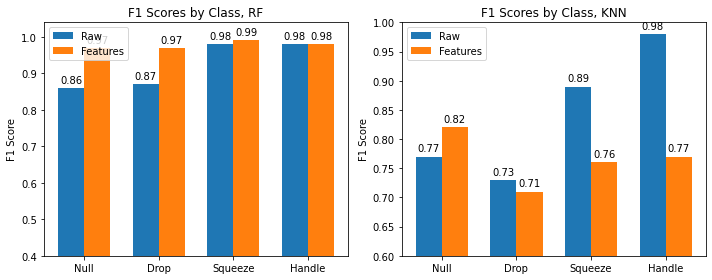

In [9]:
labels = ['Null', 'Drop', 'Squeeze', 'Handle']
mean_scores_RF_raw_w100 = [round(i,2) for i in mean_scores_RF_raw[0][9:13]]
mean_scores_RF_feat_w100 = [round(i,2) for i in mean_scores_RF_feat[0][9:13]]
mean_scores_NN_raw_w100 = [round(i,2) for i in mean_scores_NN_raw[0][9:13]]
mean_scores_NN_feat_w100 = [round(i,2) for i in mean_scores_NN_feat[-1][9:13]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(1,2, figsize=(10,4))
rects1 = ax[0].bar(x - width/2, mean_scores_RF_raw_w100, width, label='Raw')
rects2 = ax[0].bar(x + width/2, mean_scores_RF_feat_w100, width, label='Features')
rects3 = ax[1].bar(x - width/2, mean_scores_NN_raw_w100, width, label='Raw')
rects4 = ax[1].bar(x + width/2, mean_scores_NN_feat_w100, width, label='Features')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('F1 Score')
ax[0].set_ylim(0.4)
ax[0].set_title('F1 Scores by Class, RF')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].legend()
ax[1].set_ylabel('F1 Score')
ax[1].set_ylim(0.6, 1.0)
ax[1].set_title('F1 Scores by Class, KNN')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()


def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1, ax[0])
autolabel(rects2, ax[0])
autolabel(rects3, ax[1])
autolabel(rects4, ax[1])

fig.tight_layout()

plt.show()

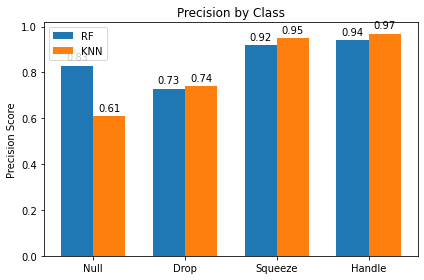

In [25]:
labels = ['Null', 'Drop', 'Squeeze', 'Handle']
mean_scores_RF_raw_w100 = [round(i,2) for i in mean_scores_RF_raw[-1][1:5]]
mean_scores_NN_raw_w100 = [round(i,2) for i in mean_scores_NN_raw[-1][1:5]]
mean_scores_RF_feat_w100 = [round(i,2) for i in mean_scores_RF_feat[-1][1:5]]
mean_scores_NN_feat_w100 = [round(i,2) for i in mean_scores_NN_feat[-1][1:5]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_scores_RF_raw_w100, width, label='RF')
rects2 = ax.bar(x + width/2, mean_scores_NN_raw_w100, width, label='KNN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision Score')
ax.set_title('Precision by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [ ]:
labels = ['Null', 'Drop', 'Squeeze', 'Handle']
mean_scores_RF_raw_w100 = [round(i,2) for i in mean_scores_RF_raw[-1][1:5]]
mean_scores_NN_raw_w100 = [round(i,2) for i in mean_scores_NN_raw[-1][1:5]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mean_scores_RF_raw_w100, width, label='RF')
rects2 = ax.bar(x + width/2, mean_scores_NN_raw_w100, width, label='KNN')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precision Score')
ax.set_title('Precision by Class')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [24]:
import pickle as pickle
filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Results'
results = {'RF_raw':score_array_RF_raw, 'RF_feat':score_array_RF_feat,
           'NN_raw':score_array_NN_raw, 'NN_feat':score_array_NN_feat}

with open(os.path.join(filepath,'results_2020_10_15.p'), 'wb') as f:
    pickle.dump(results, f)

In [2]:
import pickle as pickle
filepath = r'C:\Users\Andrew\Documents\GitHub\Tensegrity-HRI\Python\Results'
with open(os.path.join(filepath,'results_2020_10_15.p'), 'rb') as f:
    test = pickle.load(f)
print(test['RF_raw'])

[{'fit_time': array([139.30113506, 138.08112717, 137.26810026, 134.9891417 ,
       138.39702344, 138.08803797, 134.16203809, 136.3240068 ,
       116.82785463, 115.39491987, 116.36076283, 117.86336088,
       115.38780642, 116.76568985, 116.59306955]), 'score_time': array([0.72797823, 0.64396548, 0.95001578, 0.66395545, 0.89497709,
       1.1079607 , 0.95797896, 0.94506097, 0.71497035, 0.71548486,
       0.61196899, 0.60799313, 0.59500933, 0.56610513, 0.59303522]), 'test_accuracy': array([0.90910362, 0.91595581, 0.91231996, 0.91665501, 0.91980143,
       0.90917354, 0.9172843 , 0.91204027, 0.91497693, 0.91308908,
       0.91364844, 0.9176339 , 0.91176059, 0.91616557, 0.92022095]), 'test_precision_1': array([0.94911787, 0.95405201, 0.95361876, 0.95841785, 0.95338458,
       0.9449518 , 0.95595268, 0.95564103, 0.95575221, 0.94907991,
       0.95776811, 0.95368052, 0.95503597, 0.94971372, 0.95419658]), 'test_precision_2': array([0.77138569, 0.7882263 , 0.78184111, 0.78507993, 0.79696346,

In [65]:
print([np.mean(test['NN_feat'][i]['test_f1_4']) for i in np.arange(0,10)])

[0.6360004039608965, 0.6692789246208491, 0.6816353248777627, 0.7013633829002652, 0.7223625866414586, 0.7088711174846253, 0.7353105656679159, 0.7450167477771833, 0.761556619765137, 0.7705188512527126]


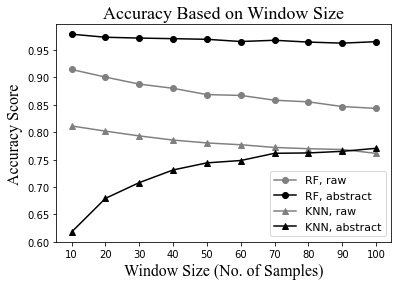

In [3]:
fig, ax = plt.subplots()
w = np.arange(10,110,10)
RF_raw_w = [np.mean(test['RF_raw'][i]['test_accuracy']) for i in np.arange(0,10)]
RF_feat_w = [np.mean(test['RF_feat'][i]['test_accuracy']) for i in np.arange(0,10)]
NN_raw_w = [np.mean(test['NN_raw'][i]['test_accuracy']) for i in np.arange(0,10)]
NN_feat_w = [np.mean(test['NN_feat'][i]['test_accuracy']) for i in np.arange(0,10)]

csfont = {'fontname':'Times New Roman'}

line1, = plt.plot(w, RF_raw_w, label='RF, raw', color='grey', marker='o')
line2, = plt.plot(w, RF_feat_w, label='RF, abstract', color='black', marker='o')
line3, = plt.plot(w, NN_raw_w, label='KNN, raw', color='grey', marker='^', markersize='6')
line4, = plt.plot(w, NN_feat_w, label='KNN, abstract', color='black', marker='^', markersize='6')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy Score',**csfont,fontsize=16)
ax.set_title('Accuracy Based on Window Size',**csfont,fontsize=18)
ax.set_xticks(w)
ax.set_xlabel('Window Size (No. of Samples)',**csfont,fontsize=16)
ax.set_ylim(0.6)
ax.legend(fontsize=11)

plt.savefig('line_plot.pdf')

In [7]:
print(RF_feat_w[0])

0.979065864913998


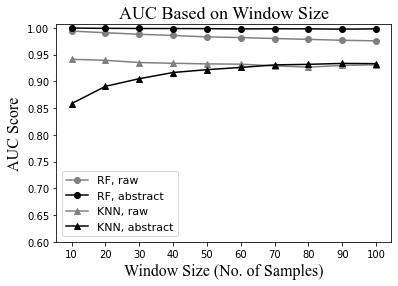

In [4]:
fig, ax = plt.subplots()
w = np.arange(10,110,10)
RF_raw_w = [np.mean(test['RF_raw'][i]['test_mc_auc_roc_ovo']) for i in np.arange(0,10)]
RF_feat_w = [np.mean(test['RF_feat'][i]['test_mc_auc_roc_ovo']) for i in np.arange(0,10)]
NN_raw_w = [np.mean(test['NN_raw'][i]['test_mc_auc_roc_ovo']) for i in np.arange(0,10)]
NN_feat_w = [np.mean(test['NN_feat'][i]['test_mc_auc_roc_ovo']) for i in np.arange(0,10)]

csfont = {'fontname':'Times New Roman'}

line1, = plt.plot(w, RF_raw_w, label='RF, raw', color='grey', marker='o')
line2, = plt.plot(w, RF_feat_w, label='RF, abstract', color='black', marker='o')
line3, = plt.plot(w, NN_raw_w, label='KNN, raw', color='grey', marker='^', markersize='6')
line4, = plt.plot(w, NN_feat_w, label='KNN, abstract', color='black', marker='^', markersize='6')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC Score',**csfont,fontsize=16)
ax.set_title('AUC Based on Window Size',**csfont,fontsize=18)
ax.set_xticks(w)
ax.set_xlabel('Window Size (No. of Samples)',**csfont,fontsize=16)
ax.set_ylim(0.6)
ax.legend(fontsize=11)

plt.savefig('line_plot2.pdf')

In [5]:
print(RF_feat_w[0])

0.9994061300647132
